In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
!pip install arch
from arch import arch_model

from tabulate import tabulate
import seaborn
import matplotlib.mlab as mlab
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 8.7 MB/s eta 0:00:00


Loading the data, and importing key libraries.

In [2]:
#APPLE
stock_symbol = "AAPL"
start_date = "2022-09-01"
end_date = "2023-11-01"
AAPL = yf.download(stock_symbol, start=start_date,end=end_date)

#SPY
stock_symbol = "SPY"
SPY = yf.download(stock_symbol, start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
SPY

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-01,392.890015,396.779999,390.040009,396.420013,388.679596,78740100
2022-09-02,400.279999,401.559998,390.329987,392.239990,384.581146,99632100
2022-09-06,393.130005,394.119995,388.420013,390.760010,383.130096,76637400
2022-09-07,390.429993,398.589996,390.200012,397.779999,390.013000,70964200
2022-09-08,395.390015,400.859985,394.119995,400.380005,392.562256,80821700
...,...,...,...,...,...,...
2023-10-25,421.890015,421.920013,417.019989,417.549988,417.549988,94223200
2023-10-26,416.450012,417.329987,411.600006,412.549988,412.549988,115156800
2023-10-27,414.190002,414.600006,409.209991,410.679993,410.679993,107367700


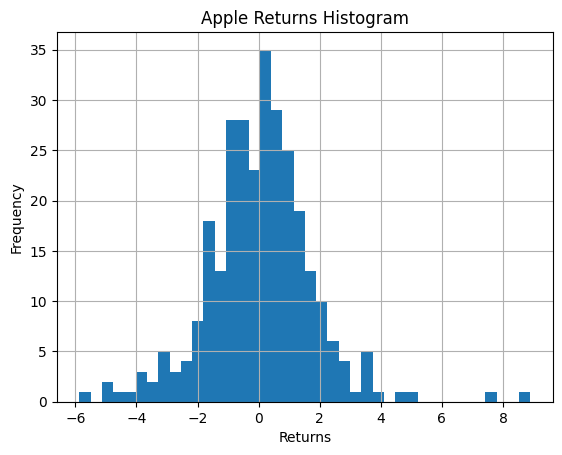

In [4]:
C_price_a = AAPL[['Adj Close']]
C_price_a ['returns'] = C_price_a.pct_change().dropna()*100
C_price_a  = C_price_a .dropna()
plt.hist(C_price_a.returns, bins=40)
plt.title('Apple Returns Histogram')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

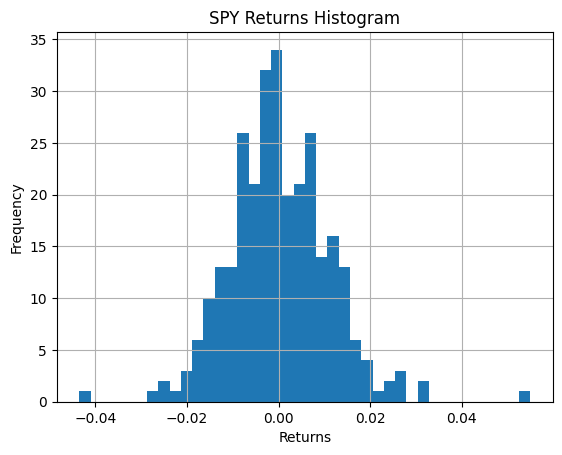

In [5]:
C_price_s = SPY[['Adj Close']]
C_price_s ['returns'] = C_price_s.pct_change()#.dropna()*100
C_price_s  = C_price_s.dropna()
plt.hist(C_price_s.returns, bins=40)
plt.title('SPY Returns Histogram')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [6]:
C_price_a ['returns']

Date
2022-09-02   -1.361112
2022-09-06   -0.821507
2022-09-07    0.925374
2022-09-08   -0.961769
2022-09-09    1.883967
                ...   
2023-10-25   -1.349166
2023-10-26   -2.460553
2023-10-27    0.796930
2023-10-30    1.230522
2023-10-31    0.281882
Name: returns, Length: 292, dtype: float64

In [7]:
#volatility for APPLE
C_price_a.dropna(inplace=True)
daily_volatility = C_price_a ['returns'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

monthly_volatility = np.sqrt(21) * daily_volatility
print('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

yearly_volatility = np.sqrt(252) * daily_volatility
print('Yearly volatility: ', '{:.2f}%'.format(yearly_volatility))

Daily volatility:  1.75%
Monthly volatility:  8.01%
Yearly volatility:  27.76%


In [8]:
#volatility for SPY
C_price_s.dropna(inplace=True)
daily_volatility = C_price_s ['returns'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

monthly_volatility = np.sqrt(21) * daily_volatility
print('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

yearly_volatility = np.sqrt(252) * daily_volatility
print('Yearly volatility: ', '{:.2f}%'.format(yearly_volatility))

Daily volatility:  0.01%
Monthly volatility:  0.05%
Yearly volatility:  0.18%


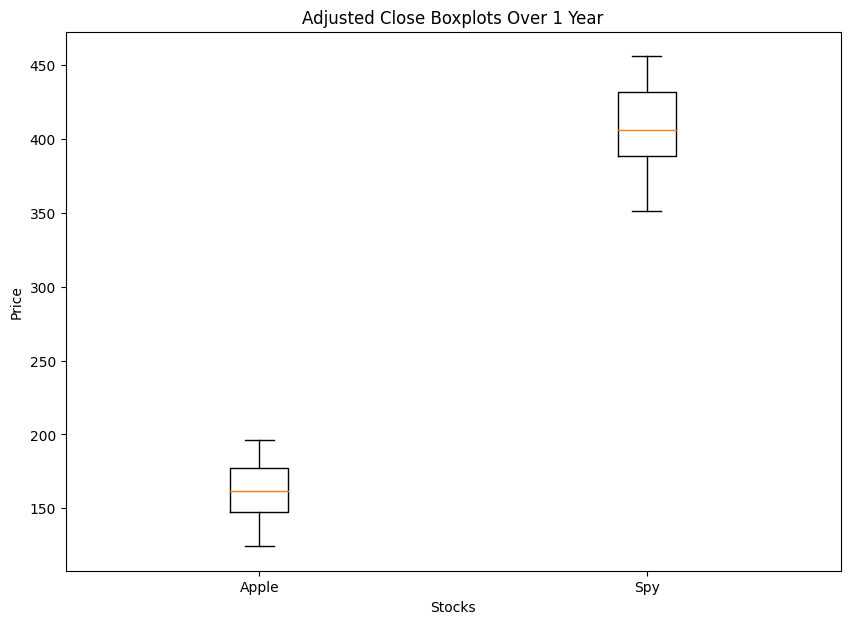

In [9]:
data = pd.concat([C_price_a, C_price_s], axis = 1)

fig, ax = plt.subplots(figsize=(10, 7))

ax.boxplot(data.iloc[:,0], positions=[1])
ax.boxplot(data.iloc[:,2], positions=[2])

ax.set_xticks([1, 2])
ax.set_xticklabels(['Apple', 'Spy'])
ax.set_xlabel('Stocks')
ax.set_ylabel('Price')
ax.set_title('Adjusted Close Boxplots Over 1 Year')
plt.show()

Apple and SPY GARCH GJR calculations.

In [10]:
C_price_a.dropna(inplace=True)
#Garch (1,1) model for APPLE
model_a = arch_model(C_price_a['returns'], p=1, o =1, q=1, mean='constant', vol='GARCH', dist='skewt')
result_a = model_a.fit(disp="on", last_obs = end_date)
result_a.summary()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22786.725918732533
Iteration:      2,   Func. Count:     20,   Neg. LLF: 22900.124341219984
Iteration:      3,   Func. Count:     29,   Neg. LLF: 565.5013789635564
Iteration:      4,   Func. Count:     38,   Neg. LLF: 4893.617594560352
Iteration:      5,   Func. Count:     47,   Neg. LLF: 585.0156831759111
Iteration:      6,   Func. Count:     56,   Neg. LLF: 548.3175905030714
Iteration:      7,   Func. Count:     65,   Neg. LLF: 602.9061127304824
Iteration:      8,   Func. Count:     74,   Neg. LLF: 544.3736687705838
Iteration:      9,   Func. Count:     83,   Neg. LLF: 547.698040171057
Iteration:     10,   Func. Count:     92,   Neg. LLF: 543.2127243960799
Iteration:     11,   Func. Count:    101,   Neg. LLF: 549.9516201288546
Iteration:     12,   Func. Count:    110,   Neg. LLF: 541.7277926633587
Iteration:     13,   Func. Count:    119,   Neg. LLF: 541.3708367077206
Iteration:     14,   Func. Count:    127,   Neg. LLF: 541.37237

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - GJR-GARCH Model Results                         
=========================================================================================
Dep. Variable:                           returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GJR-GARCH   Log-Likelihood:               -541.364
Distribution:      Standardized Skew Student's t   AIC:                           1096.73
Method:                       Maximum Likelihood   BIC:                           1122.47
                                                   No. Observations:                  292
Date:                           Wed, Nov 29 2023   Df Residuals:                      291
Time:                                   13:46:50   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0596  9.331e-02      0.639      0.523 [ -0.123,  0.242]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0149  1.219e-02      1.224      0.221 [-8.967e-03,3.882e-02]
alpha[1]       0.0000  5.568e-02      0.000      1.000      [ -0.109,  0.109]
gamma[1]       0.0397  3.385e-02      1.174      0.240   [-2.661e-02,  0.106]
beta[1]        0.9699  4.442e-02     21.836 1.058e-105      [  0.883,  1.057]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
eta            6.5381      2.814      2.324  2.015e-02 [  1.023, 12.053]
lambda         0.0214      0.124      0.172      0.863 [ -0.222,  0.265]
========================================================================

Covariance estimator: robust
"""

In [11]:
parameters = pd.DataFrame({'parameter': result_a.params,
                           'p-value': result_a.pvalues})

parameters

,parameter,p-value
mu,0.059607,5.229507e-01
omega,0.014925,2.208087e-01
alpha[1],0.000000,1.000000e+00
gamma[1],0.039747,2.403608e-01
beta[1],0.969944,1.058440e-105
eta,6.538096,2.015214e-02
lambda,0.021384,8.631648e-01


In [12]:
C_price_s.dropna(inplace=True)

#Garch (1,1) model for SPY
model_s = arch_model(C_price_s['returns'], p=1, o =1, q=1, mean='constant', vol='GARCH', dist='skewt')
result_s = model_s.fit(disp="on", last_obs = end_date)
result_s.summary()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 59085.94028268357
Iteration:      2,   Func. Count:     27,   Neg. LLF: 108745.39303772588
Iteration:      3,   Func. Count:     45,   Neg. LLF: 50721.9662688296
Iteration:      4,   Func. Count:     55,   Neg. LLF: 1648.1446239417753
Iteration:      5,   Func. Count:     65,   Neg. LLF: 246.59928374297021
Iteration:      6,   Func. Count:     76,   Neg. LLF: 28358.034584888173
Iteration:      7,   Func. Count:     94,   Neg. LLF: 1722.35555371041
Iteration:      8,   Func. Count:    103,   Neg. LLF: 1057.3794589974364
Iteration:      9,   Func. Count:    112,   Neg. LLF: 2440.89735658258
Iteration:     10,   Func. Count:    122,   Neg. LLF: 10506.668484295205
Iteration:     11,   Func. Count:    140,   Neg. LLF: 1044.4977445202835
Iteration:     12,   Func. Count:    150,   Neg. LLF: 979.5058669499986
Iteration:     13,   Func. Count:    159,   Neg. LLF: 3200.7934335257232
Iteration:     14,   Func. Count:    168,   Neg. LLF: 22159

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - GJR-GARCH Model Results                         
=========================================================================================
Dep. Variable:                           returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GJR-GARCH   Log-Likelihood:               -590.964
Distribution:      Standardized Skew Student's t   AIC:                           1195.93
Method:                       Maximum Likelihood   BIC:                           1221.66
                                                   No. Observations:                  292
Date:                           Wed, Nov 29 2023   Df Residuals:                      291
Time:                                   13:46:50   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -1.9765      0.235     -8.400  4.482e-17 [ -2.438, -1.515]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.2146e-12  5.902e-02  2.058e-11      1.000      [ -0.116,  0.116]
alpha[1]       1.0000      2.463      0.406      0.685      [ -3.828,  5.828]
gamma[1]       0.2364    434.460  5.440e-04      1.000 [-8.513e+02,8.518e+02]
beta[1]        0.0429      1.510  2.844e-02      0.977      [ -2.916,  3.002]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
eta           32.0657      5.718      5.608  2.048e-08 [ 20.859, 43.273]
lambda        -0.5642      0.953     -0.592      0.554 [ -2.432,  1.303]
========================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [13]:
parameters = pd.DataFrame({'parameter': result_s.params,
                           'p-value': result_s.pvalues})

parameters

,parameter,p-value
mu,-1.976501e+00,4.481967e-17
omega,1.214602e-12,1.000000e+00
alpha[1],1.000000e+00,6.847890e-01
gamma[1],2.363641e-01,9.995659e-01
beta[1],4.294543e-02,9.773082e-01
eta,3.206573e+01,2.047862e-08
lambda,-5.641738e-01,5.538088e-01


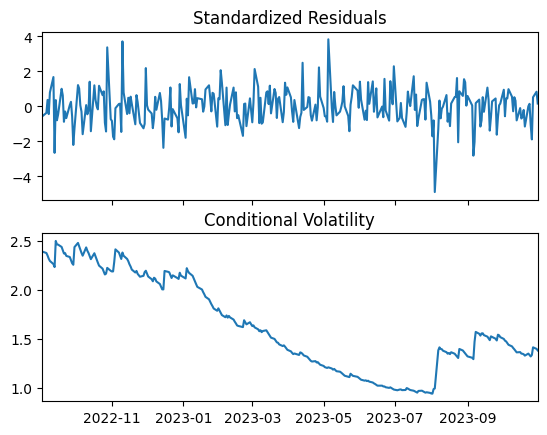

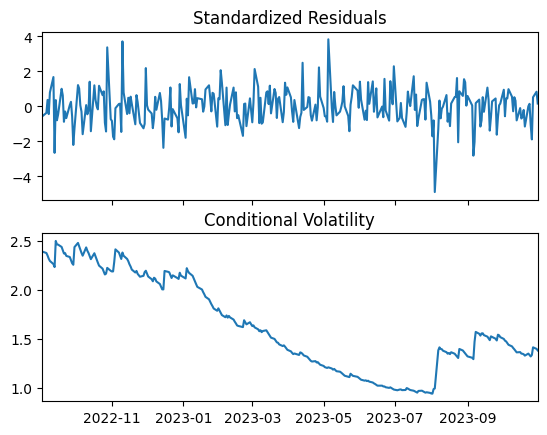

In [14]:
result_a.plot()

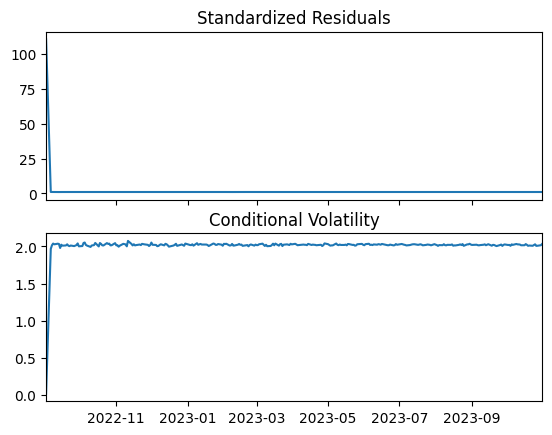

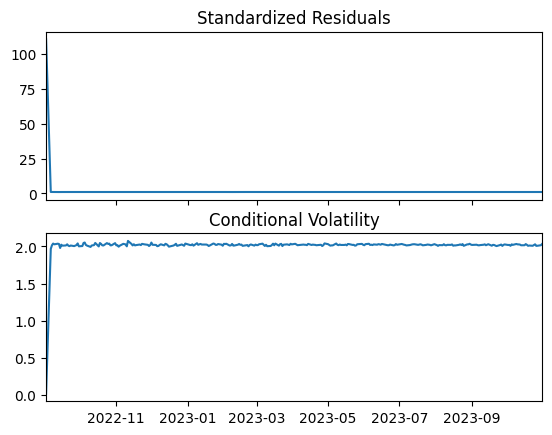

In [15]:
result_s.plot()

Text(0.5, 1.0, 'SPY Historic Returns and GARCH GJR Volatility')

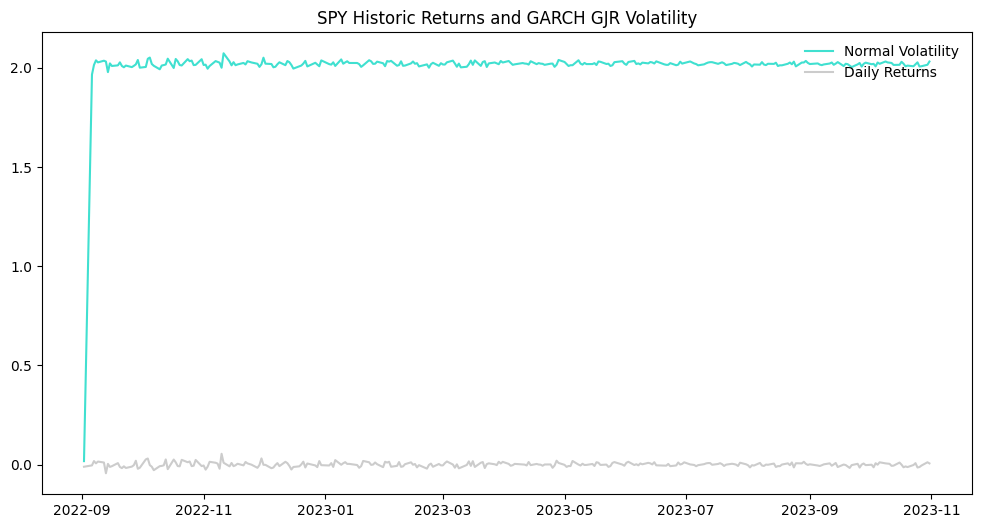

In [16]:
# Get model estimated volatility
normal_volatility_s = result_s.conditional_volatility

# Plot model fitting results
plt.figure(figsize=(12,6))
plt.plot(normal_volatility_s, color = 'turquoise', label = 'Normal Volatility')
plt.plot(C_price_s['returns'], color = 'grey', label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right', frameon=False)
plt.title('SPY Historic Returns and GARCH GJR Volatility')

Text(0.5, 1.0, 'Apple Historic Returns and GARCH GJR Volatility')

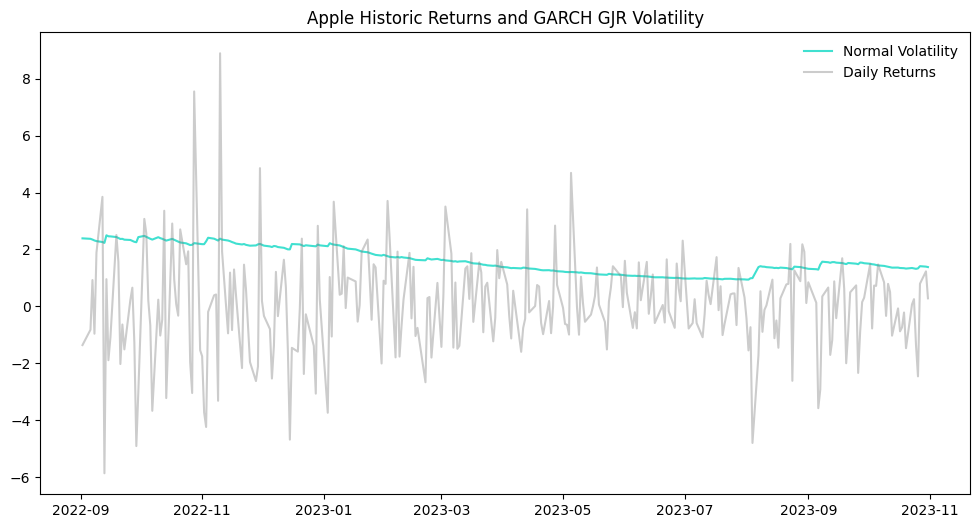

In [17]:
# Get model estimated volatility
normal_volatility_a = result_a.conditional_volatility

# Plot model fitting results
plt.figure(figsize=(12,6))
plt.plot(normal_volatility_a, color = 'turquoise', label = 'Normal Volatility')
plt.plot(C_price_a['returns'], color = 'grey', label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right', frameon=False)
plt.title('Apple Historic Returns and GARCH GJR Volatility')

[Text(0.5, 1.0, 'Standardized Resduals')]

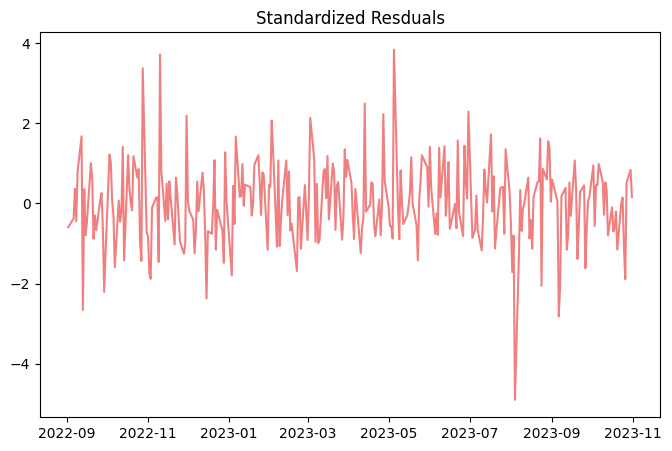

In [18]:
# Calculate standardized residual for APPLE
garch_stnd_res = result_a.resid / result_a.conditional_volatility

# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(garch_stnd_res, color='lightcoral')
ax.set(title='Standardized Resduals')

[Text(0.5, 1.0, 'Standardized Resduals')]

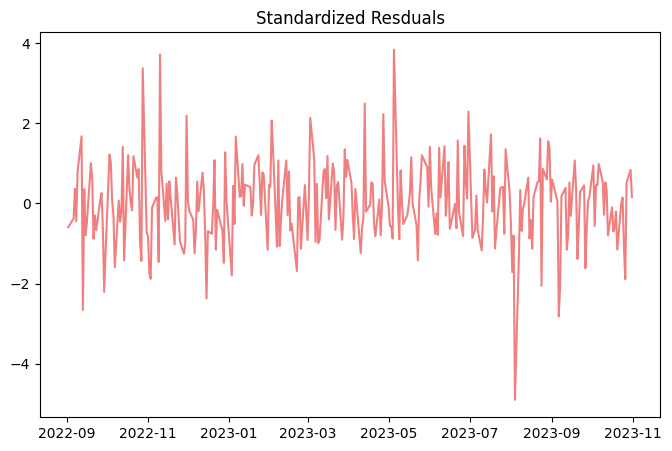

In [19]:
# Calculate standardized residual for APPLE
garch_stnd_res = result_a.resid / result_a.conditional_volatility

# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(garch_stnd_res, color='lightcoral')
ax.set(title='Standardized Resduals')

Ljung box test

In [20]:
# Ljung-Box test
import statsmodels.api as sm
ljung_test = sm.stats.acorr_ljungbox(garch_stnd_res, lags=10)
pvalues=ljung_test['lb_pvalue']

# P-values dataframe, transpose to get lags as columns
p_value = pd.DataFrame(pvalues).T

# Create column names for each lag
col_num = p_value.shape[1]
col_names = ['lag_'+str(num) for num in list(range(1,col_num+1,1))]

# Display the p-values
p_value.columns = col_names
p_value

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
lb_pvalue,0.487295,0.381152,0.574253,0.30768,0.439559,0.564296,0.678307,0.766932,0.478516,0.553533


results: standarlized residual are independently distributed and model is sound.  Why? because the P values are above 5%  and in this case we cannot rejet null hypothesis.

In [21]:
p_value = p_value.rename(index={'lb_pvalue': 'p_values'})

In [22]:
p_value

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
p_values,0.487295,0.381152,0.574253,0.30768,0.439559,0.564296,0.678307,0.766932,0.478516,0.553533


In [23]:
from datetime import datetime, timedelta
days = np.arange(1, 11)
days = pd.DataFrame(days).T

end_date_formated = datetime.strptime(end_date, "%Y-%m-%d")
days = [end_date_formated + timedelta(days=i) for i in range(1, 11)]
days = [date.strftime("%Y-%m-%d") for date in days]
days = pd.DataFrame(days)

In [24]:
Spy_forecast = result_s.forecast(horizon = 10)
spy_return_f = np.sqrt(Spy_forecast.variance[-1:].T)
spy_return_f.column = ['Returns']

In [25]:
appl_forecast = result_a.forecast(horizon = 10)
appl_return_f = np.sqrt(appl_forecast.variance[-1:].T)
appl_return_f.column = ['Returns']

In [26]:
spy_return_f

Date,2023-10-31
h.01,2.026997
h.02,2.184204
h.03,2.353602
h.04,2.536139
h.05,2.732832
h.06,2.944780
h.07,3.173167
h.08,3.419265
h.09,3.684451
h.10,3.970203


In [27]:
spy_list = spy_return_f.values
spy_list = pd.DataFrame(spy_list)
result = pd.concat([days, spy_list], axis = 1)
result = result.set_axis(['Date', 'returns'], axis=1)

In [28]:
appl_list = appl_return_f.values
appl_list = pd.DataFrame(appl_list)
result = pd.concat([days, appl_list], axis = 1)
result = result.set_axis(['Date', 'returns'], axis=1)

In [29]:
dates_old = pd.DataFrame(C_price_s.index)
dates_new = pd.DataFrame(result['Date'])
spy_returns_fhist = pd.concat([C_price_s['returns'], result['returns']], ignore_index=True)
result.dropna()
dates = pd.DataFrame()
dates = pd.concat([dates_old, dates_new], ignore_index=True)

In [30]:
dates_old = pd.DataFrame(C_price_a.index)
dates_new = pd.DataFrame(result['Date'])
appl_returns_fhist = pd.concat([C_price_a['returns'], result['returns']], ignore_index=True)
result.dropna()

,Date,returns
0,2023-11-02,1.365758
1,2023-11-03,1.364267
2,2023-11-04,1.362791
3,2023-11-05,1.361328
4,2023-11-06,1.359878
5,2023-11-07,1.358441
6,2023-11-08,1.357018
7,2023-11-09,1.355608
8,2023-11-10,1.354210
9,2023-11-11,1.352825


In [31]:
spy_returns_df = pd.concat([dates, spy_returns_fhist], axis = 1)
spy_returns_df['Date'] = pd.to_datetime(spy_returns_df['Date'])

In [32]:
appl_returns_df = pd.concat([dates, appl_returns_fhist], axis = 1)
appl_returns_df['Date'] = pd.to_datetime(appl_returns_df['Date'])

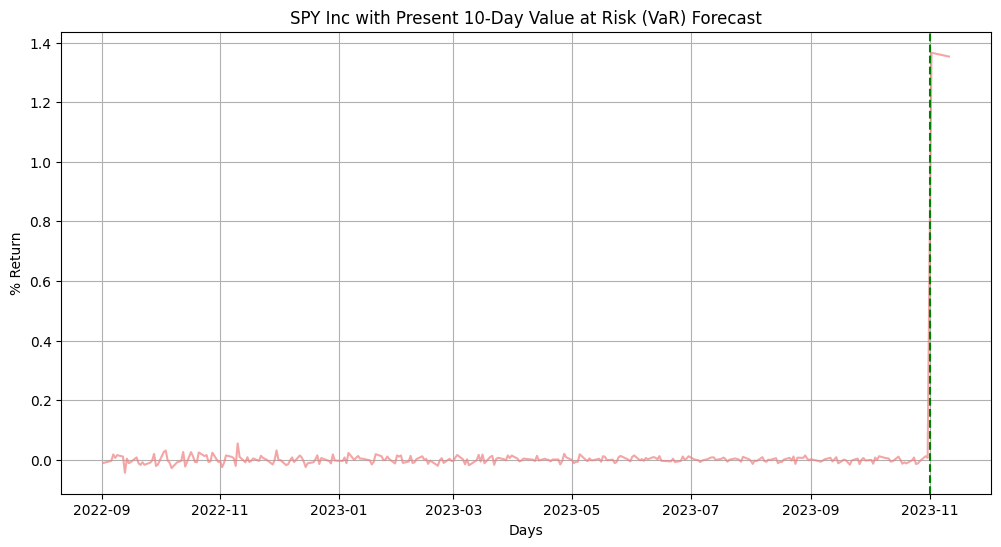

In [33]:
#plotting 10 day with the old returns

end_date = datetime.strptime(end_date, '%Y-%m-%d')

plt.figure(figsize=(12,6))
plt.plot(spy_returns_df['Date'], spy_returns_df['returns'], label='Historical Prices', color='lightcoral', alpha=0.7)
plt.axvline(x=end_date, color='green', linestyle='--', label='End Date')
plt.xlabel('Days')
plt.ylabel('% Return')
plt.title('SPY Inc with Present 10-Day Value at Risk (VaR) Forecast')
plt.grid(True)
plt.show()

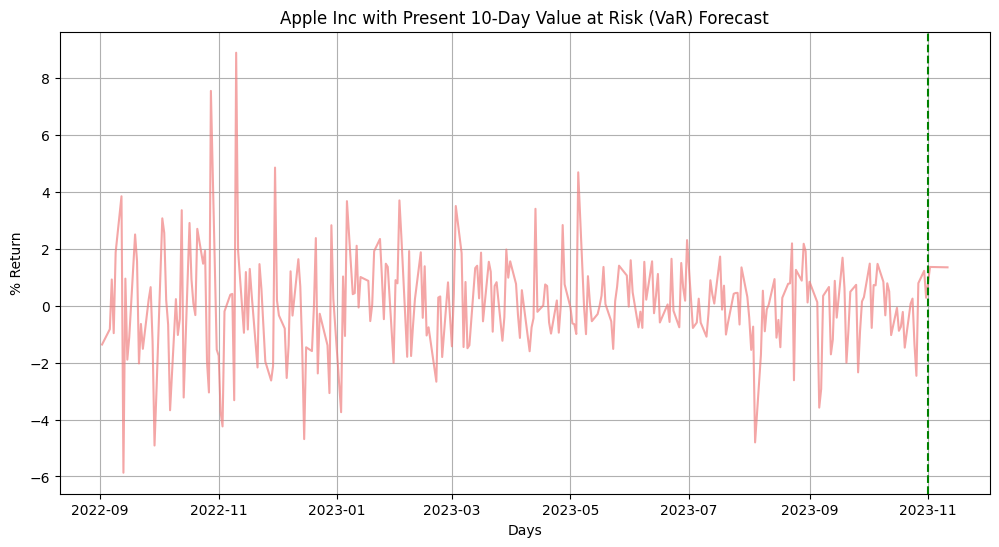

In [34]:
#plotting 10 day with the old returns

#end_date = datetime.strptime(end_date, '%Y-%m-%d')

plt.figure(figsize=(12,6))
plt.plot(appl_returns_df['Date'], appl_returns_df['returns'], label='Historical Prices', color='lightcoral', alpha=0.7)
plt.axvline(x=end_date, color='green', linestyle='--', label='End Date')
plt.xlabel('Days')
plt.ylabel('% Return')
plt.title('Apple Inc with Present 10-Day Value at Risk (VaR) Forecast')
plt.grid(True)
plt.show()

And now here is our final calculation at VaR using both Apple and Spy evaluations in out portfolio.

In [45]:
#Preppring for VaR
market_var = appl_list.iloc[-1:,] * 186.79 * 100 + spy_list.iloc[-1:,] * 28112 + 10000
val = market_var[0].values[0]

#Portfolio Weights
h = np.array([100,-100, 10000])
p = np.array([186.79, 281.12, 1])

w = h* p / np.sum(h * p)

In [46]:
#Historic VaR
list_df = pd.DataFrame({'zeros': [0] * len(C_price_a)}, index=C_price_a.index)
merged_returns = pd.concat([C_price_a['returns'], C_price_s['returns'], list_df['zeros']], axis=1)

In [47]:
merged_returns

,returns,returns,zeros
Date,,,
2022-09-02,-1.361112,-0.010545,0
2022-09-06,-0.821507,-0.003773,0
2022-09-07,0.925374,0.017965,0
2022-09-08,-0.961769,0.006536,0
2022-09-09,1.883967,0.015535,0
...,...,...,...
2023-10-25,-1.349166,-0.014352,0
2023-10-26,-2.460553,-0.011975,0
2023-10-27,0.796930,-0.004533,0


In [48]:
#GARCH GJR VaR
merged_returns_GJR = pd.concat([normal_volatility_a, normal_volatility_s, list_df['zeros']], axis=1)

Losses: 
                   0
count  2.920000e+02
mean  -2.101602e+05
std    8.395777e+06
min   -4.265233e+07
50%   -4.821252e+05
90%    9.032775e+06
95%    1.337875e+07
99%    2.255731e+07
max    2.807684e+07
current MV: 146879.77218080842	 VaR (95% daily): 13378754.486291101	CVaR: 18530693.05854057


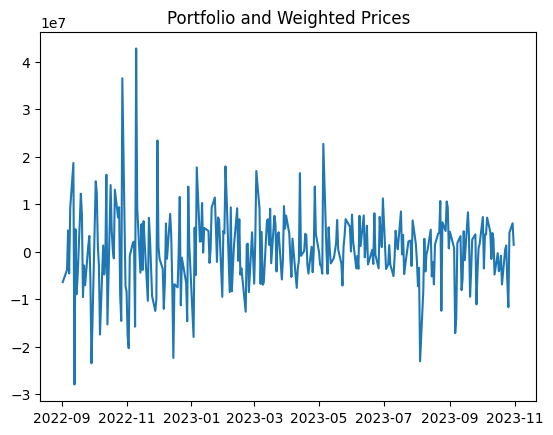

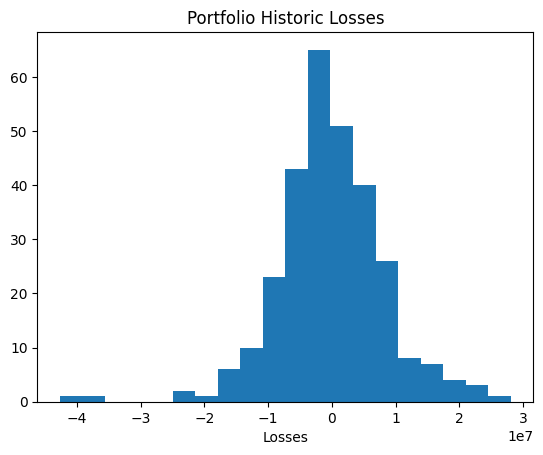

In [49]:
mvs = val * (1 + merged_returns.dot(w))

plt.title('Portfolio and Weighted Prices')
plt.plot(mvs)
loss = val - mvs
plt.figure()

plt.hist(loss, bins=20)
plt.gca().set_xlabel('Losses')
plt.title('Portfolio Historic Losses')

print('Losses: \n', pd.DataFrame(loss).describe(percentiles=[0.5, 0.90, 0.95, 0.99]))

VaR95 = np.percentile(loss, 95)
CVaR95 = loss[loss>VaR95].mean()
print(f'current MV: {val}\t VaR (95% daily): {VaR95}\tCVaR: {CVaR95}')

In [50]:
print(f"Our portfoliio is: ${round(val, 2)}")
print(f"Our expected loss at the 5% risk using historical data and our portfolio is ${round(VaR95, 2)} or greater.")

Our portfoliio is: $146879.77
Our expected loss at the 5% risk using historical data and our portfolio is $13378754.49 or greater.


Losses: 
                   0
count  2.920000e+02
mean   6.774035e+06
std    2.531562e+06
min   -1.143964e+07
50%    7.399886e+06
90%    9.825096e+06
95%    9.997329e+06
99%    1.013485e+07
max    1.019285e+07
current MV: 146879.77218080842	 VaR (95% daily): 9997329.019659638	CVaR: 10090397.4250272


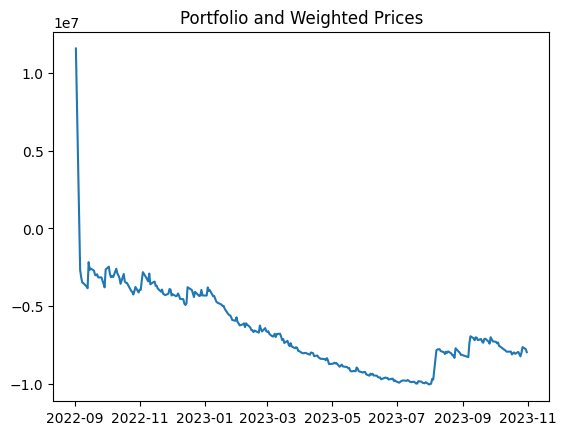

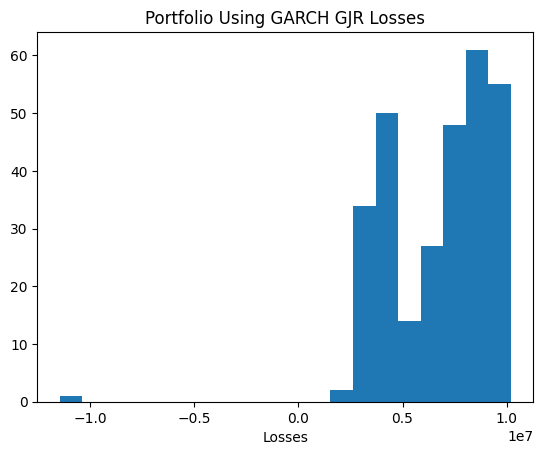

In [51]:
mvs_gjr = val * (1 + merged_returns_GJR.dot(w))

plt.title('Portfolio and Weighted Prices')
plt.plot(mvs_gjr)
loss_gjr = val - mvs_gjr
plt.figure()

plt.hist(loss_gjr, bins=20)
plt.gca().set_xlabel('Losses')
plt.title('Portfolio Using GARCH GJR Losses')

print('Losses: \n', pd.DataFrame(loss_gjr).describe(percentiles=[0.5, 0.90, 0.95, 0.99]))

VaR95_gjr = np.percentile(loss_gjr, 95)
CVaR95_gjr = loss_gjr[loss_gjr>VaR95_gjr].mean()
print(f'current MV: {val}\t VaR (95% daily): {VaR95_gjr}\tCVaR: {CVaR95_gjr}')

In [52]:
print(f"Our portfoliio is: ${round(val, 2)}")
print(f"Our expected loss at the 5% risk using GARCH GJR and our portfolio is ${round(VaR95_gjr, 2)} or greater.")

Our portfoliio is: $146879.77
Our expected loss at the 5% risk using GARCH GJR and our portfolio is $9997329.02 or greater.


Back-testing

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Backtesting for the APPLE

forecast_var_fixed = appl_return_f
model_result= model_a.fit()
actual_var = model_result.conditional_volatility ** 2
actual_var = actual_var['2023-08-09':'2023-08-22']
actual_var, forecast_var_fixed = np.array(actual_var), np.array(forecast_var_fixed)

def evaluate(observation, forecast):
    mae = mean_absolute_error(observation, forecast)
    print('Mean Absolute Error (MAE): {:.3g}'.format(mae))
    mse = mean_squared_error(observation, forecast)
    print('Mean Squared Error (MSE): {:.3g}'.format(mse))
    mape = np.mean(np.abs((observation - forecast) / observation)) * 100
    print('Mean Absolute Percentage Error (MAPE): {:.3g}'.format(mape))

    return mae, mse, mape

evaluate(actual_var, forecast_var_fixed)

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22786.725918732533
Iteration:      2,   Func. Count:     20,   Neg. LLF: 22900.124341219984
Iteration:      3,   Func. Count:     29,   Neg. LLF: 565.5013789635564
Iteration:      4,   Func. Count:     38,   Neg. LLF: 4893.617594560352
Iteration:      5,   Func. Count:     47,   Neg. LLF: 585.0156831759111
Iteration:      6,   Func. Count:     56,   Neg. LLF: 548.3175905030714
Iteration:      7,   Func. Count:     65,   Neg. LLF: 602.9061127304824
Iteration:      8,   Func. Count:     74,   Neg. LLF: 544.3736687705838
Iteration:      9,   Func. Count:     83,   Neg. LLF: 547.698040171057
Iteration:     10,   Func. Count:     92,   Neg. LLF: 543.2127243960799
Iteration:     11,   Func. Count:    101,   Neg. LLF: 549.9516201288546
Iteration:     12,   Func. Count:    110,   Neg. LLF: 541.7277926633587
Iteration:     13,   Func. Count:    119,   Neg. LLF: 541.3708367077206
Iteration:     14,   Func. Count:    127,   Neg. LLF: 541.37237

(0.4964901083190151, 0.24920074933990138, 26.69002801209735)

In [54]:
#Backtesting for SPY

forecast_var_fixed = spy_return_f
model_result= model_s.fit()
actual_var = model_result.conditional_volatility ** 2
actual_var = actual_var['2023-09-09':'2023-09-22']

actual_var, forecast_var_fixed = np.array(actual_var), np.array(forecast_var_fixed)

evaluate(actual_var, forecast_var_fixed)

Iteration:      1,   Func. Count:      9,   Neg. LLF: 59085.94028268357
Iteration:      2,   Func. Count:     27,   Neg. LLF: 108745.39303772588
Iteration:      3,   Func. Count:     45,   Neg. LLF: 50721.9662688296
Iteration:      4,   Func. Count:     55,   Neg. LLF: 1648.1446239417753
Iteration:      5,   Func. Count:     65,   Neg. LLF: 246.59928374297021
Iteration:      6,   Func. Count:     76,   Neg. LLF: 28358.034584888173
Iteration:      7,   Func. Count:     94,   Neg. LLF: 1722.35555371041
Iteration:      8,   Func. Count:    103,   Neg. LLF: 1057.3794589974364
Iteration:      9,   Func. Count:    112,   Neg. LLF: 2440.89735658258
Iteration:     10,   Func. Count:    122,   Neg. LLF: 10506.668484295205
Iteration:     11,   Func. Count:    140,   Neg. LLF: 1044.4977445202835
Iteration:     12,   Func. Count:    150,   Neg. LLF: 979.5058669499986
Iteration:     13,   Func. Count:    159,   Neg. LLF: 3200.7934335257232
Iteration:     14,   Func. Count:    168,   Neg. LLF: 22159

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(1.1684992209665683, 1.7754023264588787, 28.698617808775)

MAE and MSE represents the average absolute/squared difference between the actual and forecasted values. For both Apple and SPY the MAE/MSE are lowest, it indicates that our model has better accuracy.
For Apple , MAE is 0.06   and MSE is 0.005
For SPY , MAE is 0.014  and MSE is 0.0002